# Init Library

In [1]:
import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from difflib import SequenceMatcher

from scipy import signal, fftpack
from scipy.fft import fft, fftfreq
from scipy.signal import butter, filtfilt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Activation, Dropout
from keras import utils
utils.to_categorical

from tensorflow.keras.utils import to_categorical

# Load directory

In [12]:
load = "E:/LSTM/TA/LTSM/"
save = "C:/TA/csv-400-400/Img"
proc_30 = 'E:/LSTM/Process/30%/*.csv'
proc_50 = 'E:/LSTM/Process/50%/*.csv'
proc_70 = 'E:/LSTM/Process/70%/*.csv'
proc_90 = 'E:/LSTM/Process/90%/*.csv'
combine = 'E:/LSTM/Process/Comb/*.csv'

# Parameter

In [3]:
lowcut = 2.0
highcut = 10.0
fs = 100.0
order = 5

# Apply Parameter

In [4]:
files_csv =[]
for root, dirs, files in os.walk(load):
    for file_name in files:
        if file_name.endswith(".csv"):
            file_load = os.path.join(root, file_name)
            files_csv.append(file_load)

In [5]:
i = 0

for file_csv in files_csv:
   
    df = pd.read_csv(file_csv)
    # start_index = 1
    # end_index = 1551
    # df = df_uncut[start_index:end_index]
    var = df['X'].values
    data = df['Y'].values
     
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = signal.butter(order, [low, high], btype='band')
    
    #Filter bandpass
    filtered_signal = signal.filtfilt(b, a, data)
    
    # Rectify signal
    rectified_signal = np.abs(filtered_signal)
    
    # One-sided FFT
    signal_fft = np.fft.fft(filtered_signal)
    signal_freq = np.fft.fftfreq(len(filtered_signal), 1/fs)
    n = len(filtered_signal)
    freq = signal_freq[0:int(n/2)]
    fft_amp = np.abs(signal_fft)[0:int(n/2)]/n*2
    
    # One-sided PSD
    psd = (1/(fs*n)) * np.square(np.abs(signal_fft[:n//2]))
    freq_psd = signal_freq[0:int(n/2)]
    psd_one_side = psd[0:int(n/2)]
    
    processed_csv_file = file_csv.replace(".csv", "_processed.csv")
    df.to_csv(processed_csv_file, index=False)
    
    # fig, axs = plt.subplots(2, 2, figsize=(10,10))

    # axs[0, 0].plot(var, filtered_signal)
    # axs[0, 0].set_title(file_csv)
    # axs[0, 0].set_xlabel('Time (us)')
    # axs[0, 0].set_ylabel('Amplitude (V)')

    # axs[0, 1].plot(var, rectified_signal)
    # axs[0, 1].set_title(file_csv)
    # axs[0, 1].set_xlabel('Time (us)')
    # axs[0, 1].set_ylabel('Amplitude (V)')

    # axs[1, 0].plot(freq, fft_amp)
    # axs[1, 0].set_title(file_csv)
    # axs[1, 0].set_xlabel('Frequency (MHz)')
    # axs[1, 0].set_ylabel('Amplitude Power/Frequency (dB/Hz)')

    # axs[1, 1].plot(freq_psd, psd_one_side)
    # axs[1, 1].set_title(file_csv)
    # axs[1, 1].set_xlabel('Frequency (MHz)')
    # axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

    # save_img = file_csv+".png"
    # plt.savefig(save_img)


# Move PSD to New Folder

In [6]:
os.chdir(load)
if not os.path.exists(load+"Process"):
        os.makedirs(load+"Process")
        print("'data' folder created")
        
for root, dirs, files in os.walk(load):
        for filename in files:
            if filename.endswith("_processed.csv"):
                original_file = os.path.join(root, filename)                
                if not "Process/" in original_file:
                    print("Moved '",original_file," to ","./Process/"+filename)
                    os.rename(original_file, "./Process/"+filename)

Moved ' C:/TA/LTSM/30%\A301_processed.csv  to  ./Process/A301_processed.csv
Moved ' C:/TA/LTSM/30%\A302_processed.csv  to  ./Process/A302_processed.csv
Moved ' C:/TA/LTSM/30%\A303_processed.csv  to  ./Process/A303_processed.csv
Moved ' C:/TA/LTSM/30%\A304_processed.csv  to  ./Process/A304_processed.csv
Moved ' C:/TA/LTSM/30%\A305_processed.csv  to  ./Process/A305_processed.csv
Moved ' C:/TA/LTSM/30%\K301_processed.csv  to  ./Process/K301_processed.csv
Moved ' C:/TA/LTSM/30%\K302_processed.csv  to  ./Process/K302_processed.csv
Moved ' C:/TA/LTSM/30%\S301_processed.csv  to  ./Process/S301_processed.csv
Moved ' C:/TA/LTSM/30%\S302_processed.csv  to  ./Process/S302_processed.csv
Moved ' C:/TA/LTSM/30%\S303_processed.csv  to  ./Process/S303_processed.csv
Moved ' C:/TA/LTSM/30%\S304_processed.csv  to  ./Process/S304_processed.csv
Moved ' C:/TA/LTSM/30%\S305_processed.csv  to  ./Process/S305_processed.csv
Moved ' C:/TA/LTSM/50%\A501_processed.csv  to  ./Process/A501_processed.csv
Moved ' C:/T

# Gabungkan Dataset menjadi satu

In [6]:
# Menggunakan glob untuk mendapatkan daftar file CSV
csv_files = glob.glob(proc_30)

# Membuat list kosong untuk menyimpan DataFrame dari setiap file CSV
dataframes = []

# Menggabungkan semua file CSV menjadi satu DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

# Menggabungkan DataFrame daE:\LSTMlam list menjadi satu DataFrame utama
combined_df = pd.concat(dataframes, ignore_index=True)

combined_df.to_csv('E:/LSTM/Process/Comb/1.csv', index=True)
# combined_df.to_csv('E:/Sekolah/Telkom/TA/LTSM/Process/Comb/1.csv', index=False)

In [7]:
# Menggunakan glob untuk mendapatkan daftar file CSV
csv_files = glob.glob(proc_50)

# Membuat list kosong untuk menyimpan DataFrame dari setiap file CSV
dataframes = []

# Menggabungkan semua file CSV menjadi satu DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

# Menggabungkan DataFrame dalam list menjadi satu DataFrame utama
combined_df = pd.concat(dataframes, ignore_index=True)

combined_df.to_csv('E:/LSTM/Process/Comb/2.csv', index=True)

In [10]:
# Menggunakan glob untuk mendapatkan daftar file CSV
csv_files = glob.glob(proc_70)

# Membuat list kosong untuk menyimpan DataFrame dari setiap file CSV
dataframes = []

# Menggabungkan semua file CSV menjadi satu DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

# Menggabungkan DataFrame dalam list menjadi satu DataFrame utama
combined_df = pd.concat(dataframes, ignore_index=True)

combined_df.to_csv('E:/LSTM/Process/Comb/3.csv', index=True)

In [13]:
# Menggunakan glob untuk mendapatkan daftar file CSV
csv_files = glob.glob(proc_90)

# Membuat list kosong untuk menyimpan DataFrame dari setiap file CSV
dataframes = []

# Menggabungkan semua file CSV menjadi satu DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

# Menggabungkan DataFrame dalam list menjadi satu DataFrame utama
combined_df = pd.concat(dataframes, ignore_index=True)

combined_df.to_csv('E:/LSTM/Process/Comb/4.csv', index=True)

In [14]:
merge = 'E:/LSTM/Process/Comb/All.csv'

# Menggunakan glob untuk mendapatkan daftar file CSV
csv_files = glob.glob(combine)

# Membuat list kosong untuk menyimpan DataFrame dari setiap file CSV
dataframes = []

# Menggabungkan semua file CSV menjadi satu DataFrame
for i, file in enumerate(csv_files):
    df = pd.read_csv(file)
    df['label'] = f'label_{i+1}'
    dataframes.append(df)
# Menggabungkan DataFrame dalam list menjadi satu DataFrame utama
combined_df = pd.concat(dataframes, ignore_index=True)

# Menampilkan hasil gabungan
print(combined_df)

combined_df.to_csv(merge, index=False)

        Unnamed: 0           X         Y    label
0                0    5.000000 -0.035156  label_1
1                1    5.015625 -0.035156  label_1
2                2    5.031250 -0.039062  label_1
3                3    5.046875 -0.007812  label_1
4                4    5.062500  0.117188  label_1
...            ...         ...       ...      ...
599035      149755  199.921875 -0.003906  label_4
599036      149756  199.937500 -0.003906  label_4
599037      149757  199.953125  0.000000  label_4
599038      149758  199.968750 -1.523438  label_4
599039      149759  199.984375  1.519531  label_4

[599040 rows x 4 columns]


# Rename Label

In [15]:
data_df = pd.read_csv(merge)

label_mapping = {
    'label_1': 'Density 30%',
    'label_2': 'Density 50%',
    'label_3': 'Density 70%',
    'label_4': 'Density 90%'
}

data_df['label'] = data_df['label'].map(label_mapping)
data_df.to_csv(merge, index=False)

# Train Dataset

In [16]:
# Membaca dataset utama untuk pelatihan
merge = 'E:/LSTM/Process/Comb/All.csv'
data_df = pd.read_csv(merge)
X = data_df.iloc[:, :-1].values
y = data_df.iloc[:, -1].values

In [17]:
# Menggunakan LabelEncoder untuk mengubah label menjadi nilai numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded_categorical = utils.to_categorical(y_encoded)
print(y_encoded_categorical.shape)

(599040, 4)


In [18]:
# Membagi dataset menjadi data pelatihan dan data validasi
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded_categorical, test_size=0.2, random_state=42)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))

## Metode LSTM

In [22]:
# Membangun model LSTM
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(y_encoded_categorical.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [64]:
# Melatih model dengan dataset utama
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/100
7488/7488 [==============================] - 49s 6ms/step - loss: 0.7217 - accuracy: 0.6392 - val_loss: 0.7218 - val_accuracy: 0.6399
Epoch 2/100
7488/7488 [==============================] - 42s 6ms/step - loss: 0.7221 - accuracy: 0.6392 - val_loss: 0.7310 - val_accuracy: 0.6365
Epoch 3/100
7488/7488 [==============================] - 42s 6ms/step - loss: 0.7216 - accuracy: 0.6394 - val_loss: 0.7212 - val_accuracy: 0.6410
Epoch 4/100
7488/7488 [==============================] - 43s 6ms/step - loss: 0.7209 - accuracy: 0.6393 - val_loss: 0.7261 - val_accuracy: 0.6357
Epoch 5/100
7488/7488 [==============================] - 44s 6ms/step - loss: 0.7214 - accuracy: 0.6394 - val_loss: 0.7276 - val_accuracy: 0.6436
Epoch 6/100
7488/7488 [==============================] - 43s 6ms/step - loss: 0.7208 - accuracy: 0.6395 - val_loss: 0.7300 - val_accuracy: 0.6369
Epoch 7/100
7488/7488 [==============================] - 43s 6ms/step - loss: 0.7205 - accuracy: 0.6390 - val_loss: 0.7186 -

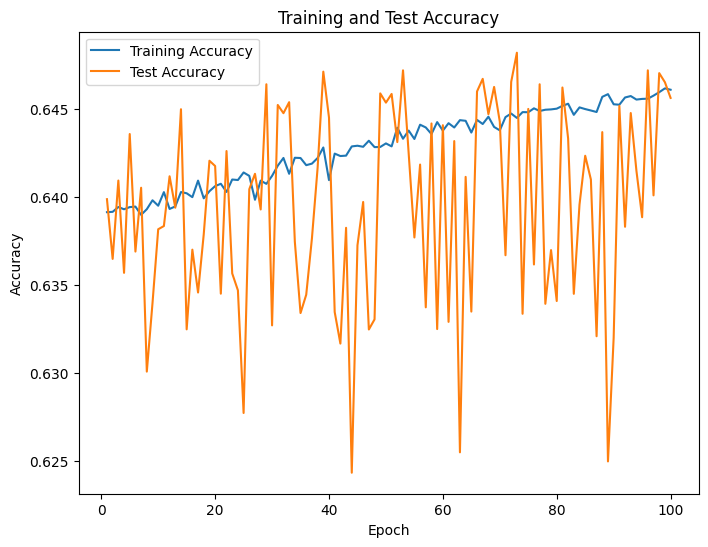

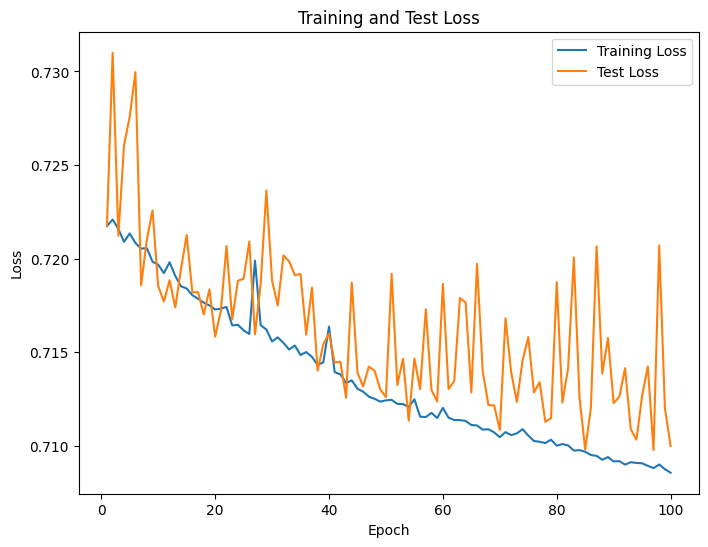

In [65]:
# Ambil histori akurasi dan loss dari proses pelatihan
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Buat plot untuk akurasi
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(test_accuracy) + 1), test_accuracy, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()

# Buat plot untuk loss 
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(test_loss) + 1), test_loss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

In [66]:
# Evaluasi performa pada data latih
training_scores = model.evaluate(X_train, y_train)
print("Performa pada Data Latih:")
print("Loss:", training_scores[0])
print("Akurasi:", training_scores[1])

14976/14976 [==============================] - 41s 3ms/step - loss: 0.7068 - accuracy: 0.6495
Performa pada Data Latih:
Loss: 0.7067720890045166
Akurasi: 0.6494578719139099


In [67]:
# Evaluasi performa pada data uji
loss, accuracy = model.evaluate(X_val, y_val)
print("Loss pada Data Uji:", loss)
print("Akurasi pada Data Uji:", accuracy)

3744/3744 [==============================] - 11s 3ms/step - loss: 0.7100 - accuracy: 0.6456
Loss pada Data Uji: 0.7099853157997131
Akurasi pada Data Uji: 0.6456497311592102


In [68]:
# Menghitung prediksi pada data uji
y_val_pred = model.predict(X_val)

3744/3744 [==============================] - 11s 2ms/step


In [70]:
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, mean_absolute_error

# metrik evaluasi untuk masalah regresi
print("Mean Squared Error:")
print(mean_squared_error(y_val, y_val_pred))

print("Mean Absolute Error:")
print(mean_absolute_error(y_val, y_val_pred))


Mean Squared Error:
0.10694685
Mean Absolute Error:
0.21322867


In [71]:
model.save('bone-predictor.h5')

# Predict Datatest

In [72]:
model = load_model('bone-predictor.h5')

In [73]:
# Membaca dataset yang ingin diprediksi
predict_df = pd.read_csv('E:/LSTM/tes_model/1.csv')
X_predict = predict_df.iloc[:].values

In [74]:
# Memprediksi label menggunakan model yang telah dilatih
y_pred_encoded = model.predict(X_predict)
y_pred = np.argmax(y_pred_encoded, axis=1)
y_pred_label = label_encoder.inverse_transform(y_pred)

ValueError: in user code:

    File "c:\Users\Afif Alaudin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\Afif Alaudin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Afif Alaudin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\Afif Alaudin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "c:\Users\Afif Alaudin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Afif Alaudin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 3, 1), found shape=(None, 2)


In [62]:
predict_df = pd.read_csv('E:/LSTM/tes_model/1.csv')
# predict_df = pd.read_csv('C:/TA/LTSM/70%/A705.csv')

# Save Predict

In [63]:
result_df = predict_df.copy()
result_df['predicted_label'] = y_pred_label
result_df.to_csv('data_predict_predicted.csv', index=False)

NameError: name 'y_pred_label' is not defined

# Result Predict

In [ ]:
print(result_df['predicted_label'].value_counts())

predicted_label
Density 70%    9253
Density 90%    2045
Density 30%     931
Density 50%     251
Name: count, dtype: int64


In [ ]:
label_counts = result_df['predicted_label'].value_counts()
highest_label = label_counts.idxmax()
highest_count = label_counts.max()

if (highest_count > (0.64*X_predict.shape[0])):
    print("Data match :", highest_label)

else:
    print("Not Match")

Data match : Density 70%


# Bone Densitometry

## Predict Datatest

In [ ]:
# Load model yang sudah ditraining
model = load_model('bone-predictor.h5')

In [ ]:
# Membaca dataset yang ingin diprediksi
predict_df = pd.read_csv('C:/TA/Pengujian Model/Data csv/1.csv')
X_predict = predict_df.iloc[:].values

In [ ]:
# Memprediksi label menggunakan model yang telah dilatih
y_pred_encoded = model.predict(X_predict)
y_pred = np.argmax(y_pred_encoded, axis=1)
y_pred_label = label_encoder.inverse_transform(y_pred)

390/390 [==============================] - 1s 838us/step


In [ ]:
predict_df = pd.read_csv('C:/TA/Pengujian Model/Data csv/1.csv')
# predict_df = pd.read_csv('C:/TA/LTSM/70%/A705.csv')

## Save Predict

In [ ]:
result_df = predict_df.copy()
result_df['predicted_label'] = y_pred_label
result_df.to_csv('data_predict_predicted.csv', index=False)

## Result Predict

print(result_df['predicted_label'].value_counts())

In [ ]:
label_counts = result_df['predicted_label'].value_counts()
highest_label = label_counts.idxmax()
highest_count = label_counts.max()

if (highest_count > (0.64*X_predict.shape[0])):
    print("Data match :", highest_label)

else:
    print("Not Match")

Data match : Density 70%
